In [1]:
import json
import collections
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from collections import defaultdict as dd
from os import listdir

In [2]:
data = collections.defaultdict(list)
sns.set(style="whitegrid")
results_folder= "results/"
listdir(results_folder)

['cht.zip_data_0.txt',
 'CHT_opt',
 'CHT',
 '.DS_Store',
 'louisville2',
 'test1',
 'louisville.zip_greedy_sc_result_0.txt',
 'louisville',
 'thesis',
 '.ipynb_checkpoints',
 'test2',
 'CHT_naive']

In [3]:
results_folder= "results/"
from collections import defaultdict
cities = defaultdict(dict)

for sub_folder in listdir(results_folder):
    
    if sub_folder=='.DS_Store':
        continue
        
    if not (sub_folder =='test1' or sub_folder =='test2'):
        continue
        
        
    dirr = "{0}/{1}/".format(results_folder,sub_folder)
    r = listdir(dirr)
    groups = {}
    linestrings = {}
    s_string = ""
    end1_start2 =dd(list)

    ons, ons_msgs, ons_wait_times, ons_route_times = [],[],[],[]
    total_generated, total_delivered = 0, 0


    for x in r[:]:     
        with open(dirr + x, 'r', encoding='utf-8') as json_file:
            
            if json_file=='.DS_Store':
                continue
                
            result = json.load(json_file)

            #on-route results
            for d in result['ons']:
                l = np.array(d['all_latencies'], dtype=float)
                median = np.nanmedian(l)
                mean = np.nanmean(l)
                temp = {
                        'Median Delay (minutes)': median /60,
                        'Median Delay (hours)': median /60/60,
                        'Mean Delay (minutes)': mean /60,
                        'mean Delay (hours)': mean /60/60,
                        'delivery_rate': d['delivery_rate']
                        }

                ons.append(temp)
                ons_msgs.extend([val /60 for val in l])


                for i in range(len(d['all_waiting_times'])):
                    ons_wait_times.append(d['all_waiting_times'][i])
                    
                    if d['all_waiting_times'][i] == None:
                        ons_route_times.append(None)
                    else: 
                        ons_route_times.append(d['all_latencies'][i] - d['all_waiting_times'][i])
                        
                total_generated += len(d['all_gen_times'])
                total_delivered += len(d['delivered_gen_times'])


    ons_msgs = np.array(ons_msgs, dtype=float)

    ons_wait_times = np.array(ons_wait_times, dtype=float)/60
    ons_route_times = np.array(ons_route_times, dtype=float)/60
    
    cities[sub_folder] = {
        'ons': ons,
        'ons_msgs': ons_msgs,
        'ons_wait_times': ons_wait_times,
        'ons_route_times': ons_route_times,
        'df1': pd.DataFrame(ons),
        'df2': pd.DataFrame(
            {
                'wait_times': ons_wait_times,
                'route_times': ons_route_times
            }
        ),
        'total_generated': total_generated,
        'total_delivered': total_delivered
    }
    

sns.set(font_scale=1.6, style="whitegrid") 
plt.subplots_adjust(hspace=0.35, wspace=0.2)

<Figure size 432x288 with 0 Axes>

In [6]:
ons_msgs

array([370.39864271, 332.39864271, 294.39864271, ...,  12.13559322,
                nan,          nan])

Mean delay (per sensor) for test1: 120.74518838849454
Median delay (per sensor) for test1: 44.78338286697373

Mean delay (per sensor) for test2: 120.74518838849454
Median delay (per sensor) for test2: 44.78338286697373



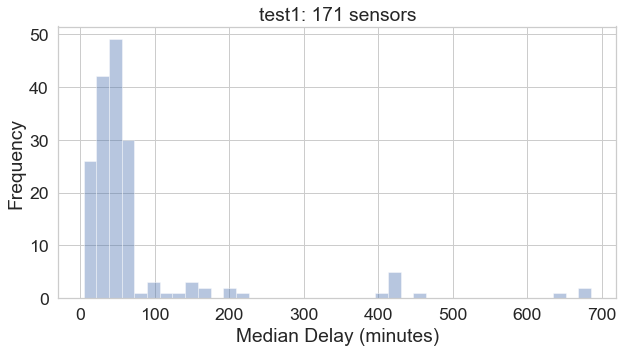

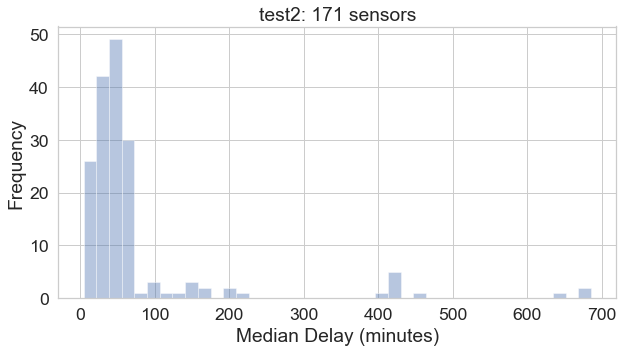

In [4]:
import math
#fig, axarr = plt.subplots(figsize=(15,5), nrows=math.ceil(len(cities)/2), ncols=1)
#plt.subplots_adjust(hspace=0.35, wspace=0.2)

ax = [len(cities)]
i = 0
for k,v in cities.items():
    #row,column = i//2, i%2
    #ax = sns.distplot(v['df1']['Median Delay (minutes)'].dropna(), ax=axarr[row][column], bins= 40, kde=False)
    plt.figure(figsize=(10,5))
    ax = sns.distplot(v['df1']['Median Delay (minutes)'].dropna(), bins= 40, kde=False)
    ax.set_title("{0}: {1} sensors".format(k, len(v['df1'])))

    print ('Mean delay (per sensor) for {}: {}'.format(k, np.nanmean(v['df1']['Mean Delay (minutes)'])))
    print ('Median delay (per sensor) for {}: {}'.format(k, np.nanmedian(v['df1']['Median Delay (minutes)'])))
    print()
    
    ax.set_ylabel('Frequency')
    i +=1
    plt.plot()

#fig.savefig('delays.png', dpi=300)

Mean delay (per packet) for test1: 130.5219317779192
Median delay (per packet) for test1: 51.030096499240926

Mean delay (per packet) for test2: 130.5219317779192
Median delay (per packet) for test2: 51.030096499240926



/Users/shina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/shina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

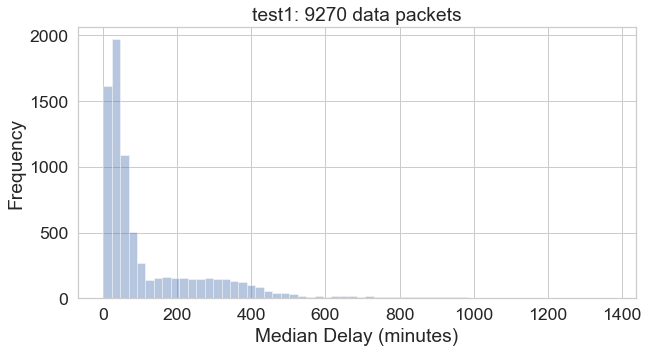

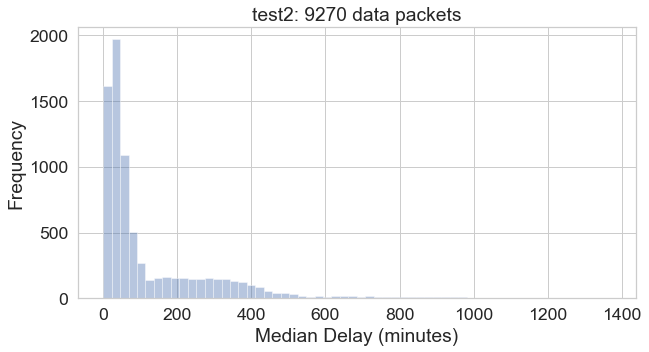

In [5]:
import math
#fig, axarr = plt.subplots(figsize=(15,5), nrows=math.ceil(len(cities)/2), ncols=1)
plt.subplots_adjust(hspace=0.35, wspace=0.2)

i = 0
for k,v in cities.items():
    plt.figure(figsize=(10,5))
    
    ax = sns.distplot(v['ons_msgs'],  kde=False, bins= 60)
    ax.set_title("{0}: {1} data packets".format(k, len(v['ons_msgs'])))
    #ax.figure.set_size_inches((10,5))
    ax.set_xlabel('Median Delay (minutes)'), ax.set_ylabel('Frequency')
    print ('Mean delay (per packet) for {}: {}'.format(k, np.nanmean(v['ons_msgs'])))
    print ('Median delay (per packet) for {}: {}'.format(k, np.nanmedian(v['ons_msgs'])))
    print()
    
    
    plt.plot()
    
    
    i +=1
#fig.savefig('delays2.png', dpi=300)

For test1 

Sensor->Bus 
Mean: 110.79439341752774, Median: 27.0
Bus->Gateway 
Mean: 19.727538360391474, Median: 16.030096499240923



For test2 

Sensor->Bus 
Mean: 110.79439341752774, Median: 27.0
Bus->Gateway 
Mean: 19.727538360391474, Median: 16.030096499240923





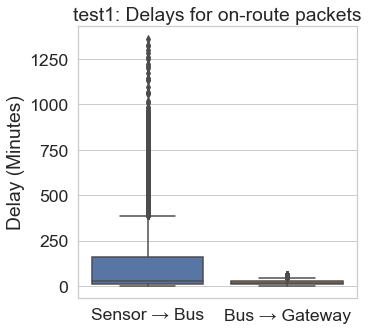

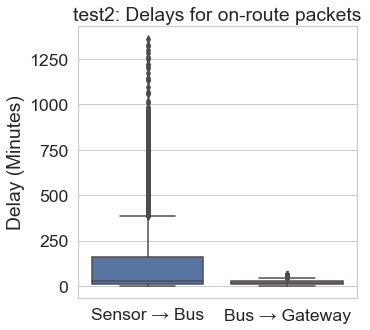

In [6]:
i = 0
for k,v in cities.items():
    plt.figure(figsize=(10,5))
    
    a = v['ons_wait_times'][~np.isnan(v['ons_wait_times'])]
    b = v['ons_route_times'][~np.isnan(v['ons_route_times'])]
    
    ax = sns.boxplot(
        x=['Sensor \u2192 Bus','Bus \u2192 Gateway'],
        y=[a, b]
    )
    ax.set_ylabel('Delay (Minutes)')
    ax.figure.set_size_inches((5,5))
    ax.set_title(k + ": Delays for on-route packets")
    ax.figure.savefig('e.png', dpi=300)

    print("For {}".format(k), "\n")
    print(
        "Sensor->Bus \nMean: {0}, Median: {1}".format(
            np.nanmean(v['ons_wait_times']), 
            np.nanmedian(v['ons_wait_times'])
        )
    )
    
    print(
        "Bus->Gateway \nMean: {0}, Median: {1}".format(
            np.nanmean(v['ons_route_times']),
            np.nanmedian(v['ons_route_times'])
        )
    )
    print('\n\n')

Median delivery rate (per sensor) for test1: 0.8461538461538461
Cummulative delivery rate for test1: 0.8429341963322546

Median delivery rate (per sensor) for test2: 0.8461538461538461
Cummulative delivery rate for test2: 0.8429341963322546



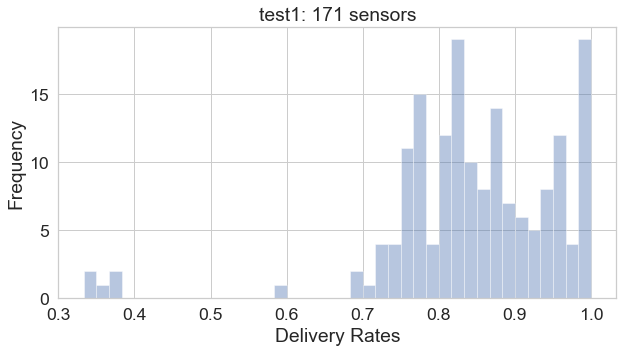

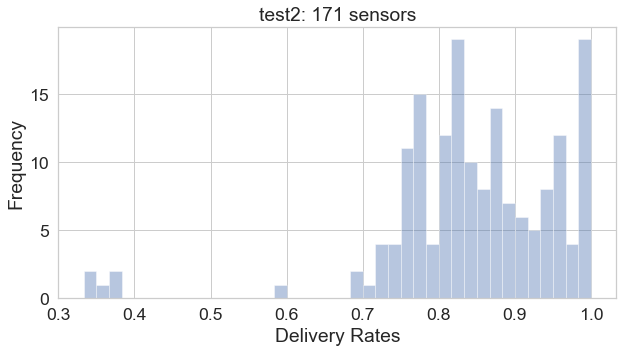

In [7]:
import math
#fig, axarr = plt.subplots(figsize=(15,5), nrows=math.ceil(len(cities)/2), ncols=1)
#plt.subplots_adjust(hspace=0.35, wspace=0.2)

ax = [len(cities)]
i = 0
for k,v in cities.items():
    plt.figure(figsize=(10,5))
    ax = sns.distplot(v['df1']['delivery_rate'].dropna(), bins= 40, kde=False)
    ax.set_title("{0}: {1} sensors".format(k, len(v['df1'])))
    
    print ('Median delivery rate (per sensor) for {}: {}'.format(k, np.nanmedian(v['df1']['delivery_rate'])))
    print ('Cummulative delivery rate for {}: {}'.format(k, v['total_delivered']/v['total_generated']))
    print()
    
    ax.set_xlabel('Delivery Rates')
    ax.set_ylabel('Frequency')
    i +=1
    plt.plot()

#fig.savefig('delays.png', dpi=300)